Drit mobility = 1.61 × 10^-05


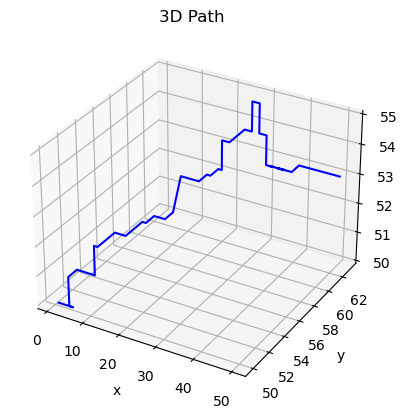

In [25]:
#случай: нет разброса энергий и нет внешнего поля,нет перескока по диагонали ,3-мерный вариант
from math import exp,log1p
from random import random
import matplotlib.pyplot as plt
gamma=10**8  #int(input())
v0= 10**13           #int(input())
T= 298             #int(input())
F= 2.5*10**7           #int(input())
z= 1.6*10**(-19)
a=10**(-9)
k=1.38 *10**(-23)
#Нет разброса энергии и поля
vij0=v0*exp(-2*gamma*a)
vij1=vij0*exp(-(z*F*a)/(k*T))
vij2=vij0*exp((z*F*a)/(k*T))

K=[]
A=[]
Sx=[]
Sy=[]
Sz=[]
n=50             #int(input())#number of cycles
Lx=50 #int(input())#the distance between the first and the last point
Ly=100
Lz=100

for u in range(1,n+1):
    x=0
    y=50
    z=50
    while x!=Lx:
        
        #Генерация массива вероятностей
        B=[]
        if  (0<x<Lx) :
            if (0<y<Ly) and (0<z<Lz): #1    n=5
                pij0=vij0/(4*vij0+vij1+vij2)
                pij1= vij1/(4*vij0+vij1+vij2)
                pij2=vij2/(4*vij0+vij1+vij2)
                pij01=(pij0+pij1)/2
                pij02=pij01*3/2
                B.append(pij1)
                B.append(pij01)
                B.append(pij02)
                B.append(pij0)
                B.append(pij2)
            if (y==Ly or y==0) and (z==Lz or z==0):#2v n=3
                pij2=vij2/(2*vij0+vij1+vij2)
                pij0=vij0/(2*vij0+vij1+vij2)
                pij1=vij1/(2*vij0+vij1+vij2)
                B.append(pij1)
                B.append(pij0)
                B.append(pij2)
            if (y!=Ly or y!=0) and (z==Lz or z==0):
                 pij2=vij2/(3*vij0+vij2+vij1)
                 pij0=vij0/(3*vij0+vij2+vij1)
                 pij1= vij1/(3*vij0+vij2+vij1)
                 pij01=(pij1+pij0)/2
                 B.append(pij1)
                 B.append(pij01)
                 B.append(pij0)
                 B.append(pij2)
               
            if (y==Ly or y==0) and (z!=Lz or z!=0):#3b n=4
                pij2=vij2/(3*vij0+vij1+vij2)
                pij0=vij0/(3*vij0+vij1+vij2)
                pij1=vij1/(3*vij0+vij1+vij2)
                pij01=(pij0+pij1)/2
                B.append(pij1)
                B.append(pij01)
                B.append(pij0)
                B.append(pij2)
             
                
                
                
        elif (x==0 or x==Lx) :
         if (y==Ly or y==0) and (z==Lz or z==0): #2  n=2
                pij2=vij2/(2*vij0+vij2)
                pij0=vij0/(2*vij0+vij2)
                B.append(pij1)
                B.append(pij2)
         if (y==Ly or y==0) and (z!=Lz or z!=0):#2b   n=3
                pij2=vij2/(3*vij0+vij2) 
                pij0=vij0/(3*vij0+vij2)
                pij20=pij1/2
                B.append(pij20)
                B.append(pij0)
                B.append(pij2)
          
         if (y!=Ly or y!=0) and (z!=Lz or z!=0):   #n=4
                pij2=vij2/(4*vij0+vij2)
                pij0=vij0/(4*vij0+vij2)
                pij=pij0/2
                pij201=pij
                pij202=pij*3/2
                B.append(pij201)
                B.append(pij202)
                B.append(pij0)
                B.append(pij2)
        if ((y!=Ly or y!=0) and (z==Lz or z==0)):   #n=3
                pij2=vij2/(3*vij0+vij2)
                pij0=vij0/(3*vij0+vij2)
                pij20=pij1/2
                B.append(pij20)
                B.append(pij0)
                B.append(pij2)
                         
        pos=random()
        N=len(B)
            
        #Время ожидания
        if N==5:w=4*vij0+vij1+vij2
        if N==4:
            if x==1 or x==Lx: w=4*vij0+vij2
            else :w=3*vij0+vij2+vij1
        if N==3:
            if x==1 or x==Lx: w=3*vij0+vij2
            else: w= 2*vij0+vij1+vij2
        if N==2:
            if x==1 or x==Lx: w=2*vij0+vij2
           
        
       #для лучшего варианта - подпрограмма пересчета вероятности
        pu=random()
        t=log1p(1/pu)*w**(-1)
        A.append(t)
        #print(pos)
        #print(B) 
        #print(y,x)
             #Выбор места прыжка
        
        if N==5:
                    if (pos <=B[0]): x-=1
                    if (B[0]<pos<=B[1]) :z-=1 
                    if (B[1]<pos<=B[2])   : z+=1
                    if (B[2]<pos<=B[3]): y-=1
                    if (B[3]<pos<=B[4] ): y+=1
                    if (pos>B[4]):x+=1
                        
        if N==4:
            if x==0 or x==Lx:
                if (pos <=B[0]):z-=1
                if ( B[0]<pos<=B[1]):z+=1 
                if  (B[1]<pos<=B[2]):y-=1
                if  (B[2]<pos<=B[3]):y+=1
                if  (pos>B[3]):x+=1
            else:
                if (y==Ly or y==0) and (z!=Lz or z!=0):
                    if (pos <=B[0]):x-=1
                    if ( B[0]<pos<=B[1]):z-=1 
                    if  (B[1]<pos<=B[2]) :z+=1
                    if  (B[2]<pos<=B[3]):
                         if y<Ly:y+=1
                         else:y-=1
                    if  (pos>B[3]):x+=1
                if (y!=Ly or y!=0) and (z==Lz or z==0):
                    if (pos <=B[0]):x-=1
                    if ( B[0]<pos<=B[1]):
                        if z<Lz:z+=1
                        else:z-=1
                    if  (B[1]<pos<=B[2]) :y-=1
                    if  (B[2]<pos<=B[3]):y+=1
                    if  (pos>B[3]):x+=1
                    
        if N==3:
                         
                if (0<x<Lx) :
                    if (pos <=B[0]): x-=1
                    if (B[0]<pos<=B[1]) :
                         if (z==Lz):z-=1
                         else:z+=1
                    if (B[1]<pos<=B[2])  :
                        if y==Ly:y-=1
                        else:y+=1
                    if (pos>B[2]):x+=1
                    
                if(x==Lx or x==0):
                    if (y==Ly or y ==0 ):
                        if (pos <=B[0]): z-=1
                        if (B[0]<pos<=B[1]) :z+=1 
                        if (B[1]<pos<=B[2]):
                            if y==Ly:y-=1
                            else:y+=1
                        if (pos>B[2]):x+=1
                    else:
                        if (pos <=B[0]):
                            if z==Lz:z-=1
                            else:z+=1
                        if (B[0]<pos<=B[1]) :y-=1
                        if (B[1]<pos<=B[2]): y+=1
                        if (pos>B[2]):x+=1
        if N==2:
            if (pos <=B[0]):
                 if z==Lz:z-=1
                 else:z+=1
            if (B[0]<pos<=B[1]) :
                 if y==Ly :y-=1
                 else: y+=1
            if (pos>B[1]):x+=1
        if u==1:
            Sx.append(x)
            Sy.append(y)
            Sz.append(z)
                        
                
                
                        
                        
                     
    s= 0 #Суммарное время прохода 
    for i in range (len (A)):
        s+=A[i]
    K.append(s)
    
    for i in range (len (A)):A[i]=0
    



for j in range (len (K)):
               Tj=1/K[j]
Tjk=Tj * 1/n
miu=Tjk * Lx/F*10**(-9)
  
formatted_miu = f"{miu:.2e}".replace("e", " × 10^")
print(f'Drit mobility = {formatted_miu}')

#Plotting
plt.figure()

ax = plt.axes(projection ='3d')

ax.plot3D(Sx, Sy, Sz, 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('3D Path ')
plt.show()